# Tennis

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg_agent import MADDPG

env = UnityEnvironment(file_name='/data/Tennis_Linux_NoVis/Tennis')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
brain = env.brains[brain_name]
# number of agents
num_agents = len(env_info.agents)
# size of each action
action_size = brain.vector_action_space_size

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
# create an agent
agent = MADDPG(state_size,action_size,num_agents,0)



### 2. Train the Agent with MADDPG

Run the code cell below to train the agent from scratch. Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 100	Average score: 0.006
Episode 200	Average score: 0.012
Episode 300	Average score: 0.009
Episode 400	Average score: 0.013
Episode 500	Average score: 0.051
Episode 600	Average score: 0.091
Episode 700	Average score: 0.089
Episode 800	Average score: 0.091
Episode 900	Average score: 0.106
Episode 1000	Average score: 0.112
Episode 1100	Average score: 0.128
Episode 1200	Average score: 0.220
Episode 1300	Average score: 0.303
Solved in episode: 1372 	Average score: 0.509


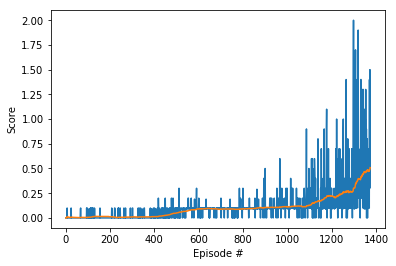

In [4]:
def maddpg(n_episodes=5000):
    scores_deque = deque(maxlen=100)
    scores = []
    average_scores_list = []

    for i_episode in range(1, n_episodes+1):                                    
        env_info = env.reset(train_mode=True)[brain_name]     
        states = env_info.vector_observations               
        score = np.zeros(num_agents)
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]            
            next_states = env_info.vector_observations
            rewards = env_info.rewards         
            dones = env_info.local_done                         
            agent.step(states, actions, rewards, next_states, dones)        
            states = next_states
            score += rewards  

            if any(dones):                                 
                break

        score_max = np.max(score)
        scores.append(score_max)
        scores_deque.append(score_max)
        average_score = np.mean(scores_deque)
        average_scores_list.append(average_score)

        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)), end="")  

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage score: {:.3f}'.format(i_episode , average_score))

        if average_score >= 0.5:
            agent.save_weights()
            print("\rSolved in episode: {} \tAverage score: {:.3f}".format(i_episode , average_score))
            break
    return scores , average_scores_list

scores,average = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(average)+1), average, label='Running mean over 100 episodes')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('score')
plt.show()



### 3. Evaluation of Agent

In the next code cell, you will control the agent and receive feedback from the environment.

In [5]:
agent.load_weights()
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.7950000120326877


When finished, you can close the environment.

In [6]:
env.close()